In [123]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    silhouette_score, davies_bouldin_score, calinski_harabasz_score,
    adjusted_rand_score, normalized_mutual_info_score
)
from collections import Counter

In [124]:
# Step 1: Load iris dataset
iris = fetch_ucirepo(id=53)
X = iris.data.features.values
y_true = iris.data.targets.values.ravel()  # label sebenarnya

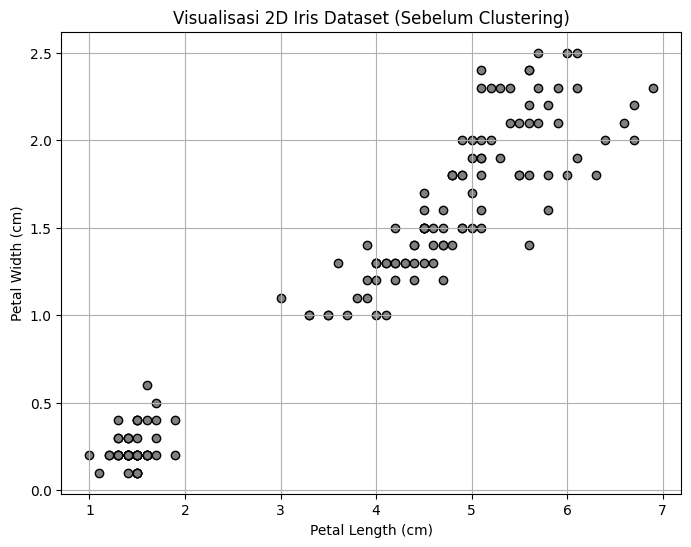

In [125]:
# Step 2: Ambil hanya 2 fitur pertama agar bisa divisualisasikan
X_vis = X[:, 2:]
X_clust = X_vis.copy()
plt.figure(figsize=(8,6))
plt.scatter(X_clust[:, 0], X_clust[:, 1], c='gray', edgecolor='k')
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("Visualisasi 2D Iris Dataset (Sebelum Clustering)")
plt.grid(True)
plt.show()

In [126]:
# Step 3: Inisialisasi variabel
k = 3
clusters = {}
np.random.seed(23)

In [127]:
# Step 4: Inisialisasi pusat cluster secara acak
initial_idx = np.random.choice(range(X_clust.shape[0]), size=k, replace=False)
for idx in range(k):
    center = X_clust[initial_idx[idx]]
    clusters[idx] = {
        'center': center,
        'points': []
    }


In [128]:
# Step 5: Fungsi Euclidean distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [129]:
# Step 6: Assign setiap titik ke cluster terdekat
def assign_clusters(X, clusters):
    for i in range(X.shape[0]):
        dists = [distance(X[i], clusters[j]['center']) for j in range(k)]
        cluster_id = np.argmin(dists)
        clusters[cluster_id]['points'].append(X[i])
    return clusters

In [130]:
# Step 7: Update posisi pusat cluster berdasarkan rata-rata titik
def update_clusters(clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            clusters[i]['center'] = points.mean(axis=0)
        clusters[i]['points'] = []
    return clusters

In [131]:
# Step 8: Prediksi cluster tiap titik
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dists = [distance(X[i], clusters[j]['center']) for j in range(k)]
        pred.append(np.argmin(dists))
    return pred

In [132]:
# Step 9: Jalankan iterasi hingga konvergensi
max_iter = 100
tolerance = 1e-4
iteration = 0

for _ in range(max_iter):
    iteration += 1
    prev_centers = [clusters[i]['center'].copy() for i in range(k)]
    
    clusters = assign_clusters(X_clust, clusters)
    clusters = update_clusters(clusters)
    
    converged = True
    for i in range(k):
        if np.linalg.norm(clusters[i]['center'] - prev_centers[i]) > tolerance:
            converged = False
            break
    if converged:
        print(f"Konvergen dalam {iteration} iterasi.")
        break
else:
    print("Belum konvergen setelah maksimum iterasi.")

Konvergen dalam 10 iterasi.


In [133]:
# Step 10: Prediksi final
y_pred = np.array(pred_cluster(X_clust, clusters))

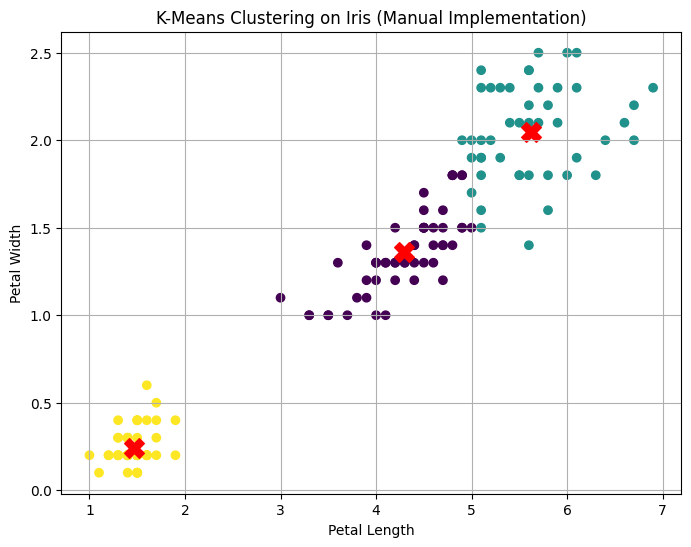

In [134]:
# Step 11: Visualisasi clustering
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_pred, cmap='viridis')
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='X', s=200, c='red')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("K-Means Clustering on Iris (Manual Implementation)")
plt.grid(True)
plt.show()

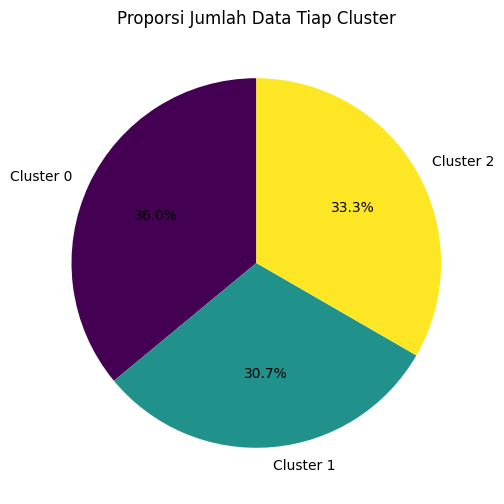

In [135]:
# Pie chart proporsi cluster
cluster_counts = np.bincount(y_pred)
plt.figure(figsize=(6,6))
plt.pie(cluster_counts, labels=[f'Cluster {i}' for i in range(k)],
        autopct='%1.1f%%', startangle=90, colors=plt.cm.viridis(np.linspace(0, 1, k)))
plt.title("Proporsi Jumlah Data Tiap Cluster")
plt.show()

In [136]:
# Step 12: Evaluasi clustering tanpa ground truth
print("\n=== Evaluasi Unsupervised Clustering ===")
print(f"Silhouette Score           : {silhouette_score(X_clust, y_pred):.4f}")
print(f"Davies-Bouldin Index       : {davies_bouldin_score(X_clust, y_pred):.4f}")
print(f"Calinski-Harabasz Index    : {calinski_harabasz_score(X_clust, y_pred):.4f}")


=== Evaluasi Unsupervised Clustering ===
Silhouette Score           : 0.6601
Davies-Bouldin Index       : 0.4858
Calinski-Harabasz Index    : 1214.2256


In [137]:

# Step 13: Evaluasi dengan ground truth
# Purity function
def purity_score(y_true, y_pred):
    contingency_matrix = {}
    for label in np.unique(y_pred):
        indices = np.where(y_pred == label)[0]
        true_labels = y_true[indices]
        most_common = Counter(true_labels).most_common(1)
        contingency_matrix[label] = most_common[0][1]  # jumlah label mayoritas
    return sum(contingency_matrix.values()) / len(y_true)

print("\n=== Evaluasi Dibanding Label Sebenarnya ===")
print(f"Purity                     : {purity_score(y_true, y_pred):.4f}")
print(f"Adjusted Rand Index (ARI)  : {adjusted_rand_score(y_true, y_pred):.4f}")
print(f"Normalized Mutual Info     : {normalized_mutual_info_score(y_true, y_pred):.4f}")


=== Evaluasi Dibanding Label Sebenarnya ===
Purity                     : 0.9467
Adjusted Rand Index (ARI)  : 0.8510
Normalized Mutual Info     : 0.8366
